In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


file_path = './statics/life_indicator_2008-2018.xlsx'
data = []
for i in range(2008, 2019):
    data.append(pd.read_excel(file_path, sheet_name=str(i)))

# data_2008 = pd.read_excel(file_path, sheet_name='2008')
data_2008 = data[0]

# Display the first few rows of the dataset to understand its structure
data_2008.head()


,Country Name,"Agriculture, forestry, and fishing, value added (% of GDP)","Annual freshwater withdrawals, total (% of internal resources)",Current health expenditure (% of GDP),Forest area (% of land area),GDP (current US$),"Immunization, measles (% of children ages 12-23 months)",Income share held by lowest 20%,"Industry (including construction), value added (% of GDP)","Population, total","Prevalence of underweight, weight for age (% of children under 5)",Research and development expenditure (% of GDP),"School enrollment, secondary (% net)","Life expectancy at birth, total (years)"
0,Afghanistan,24.892270,43.015907,10.256495,1.852782,1.010930e+10,59.0,NaN,26.915628,26427199,NaN,NaN,NaN,59.852
1,Albania,16.837054,4.546691,5.509624,28.449489,1.288135e+10,98.0,8.9,25.161010,2947314,NaN,0.15412,NaN,77.653
2,Algeria,6.586676,63.158553,4.201883,0.776827,1.710010e+11,88.0,NaN,57.835442,34569592,NaN,NaN,NaN,72.941
3,Angola,4.805339,0.476824,3.322903,58.769649,8.853866e+10,48.0,5.4,60.254820,21691522,NaN,NaN,9.15376,54.633
4,Antigua and Barbuda,1.547636,9.230769,4.200270,20.259091,1.370070e+09,99.0,NaN,19.123916,83251,NaN,NaN,NaN,76.410


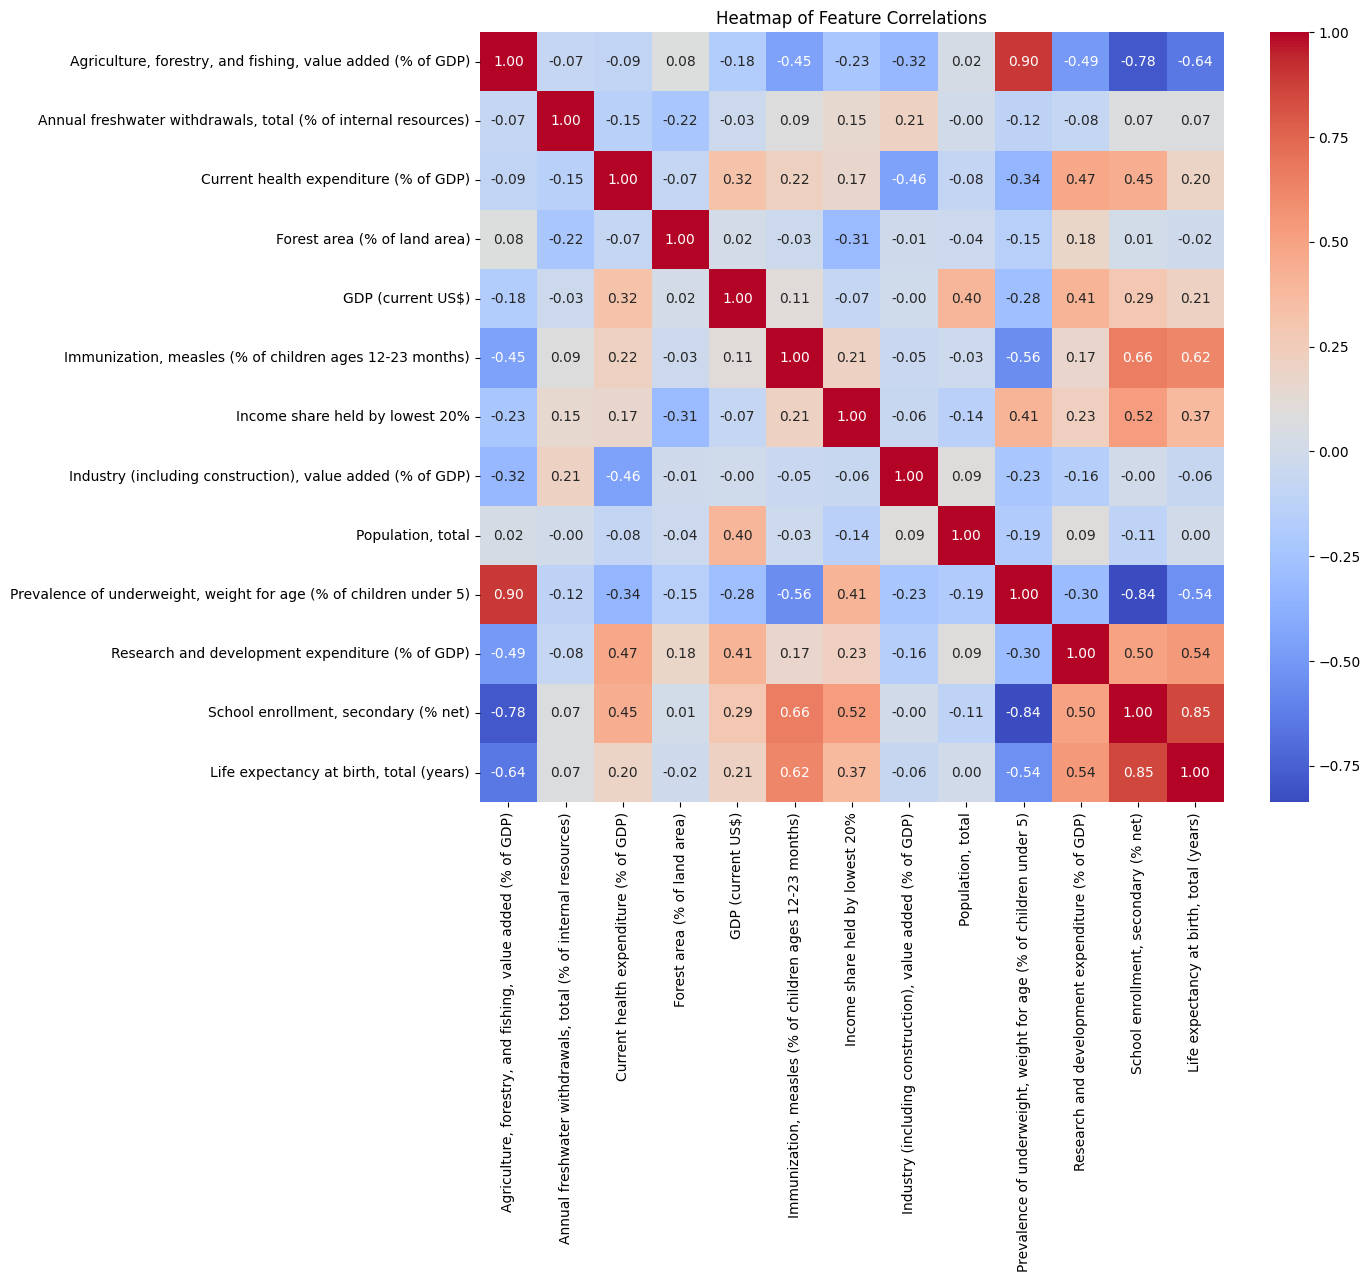

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop the country name as it is not needed for correlation analysis
data_numerical = data_2008.drop(columns=["Country Name"])

# Compute correlations between features
correlation_matrix = data_numerical.corr()

# Generate a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Heatmap of Feature Correlations')
plt.show()


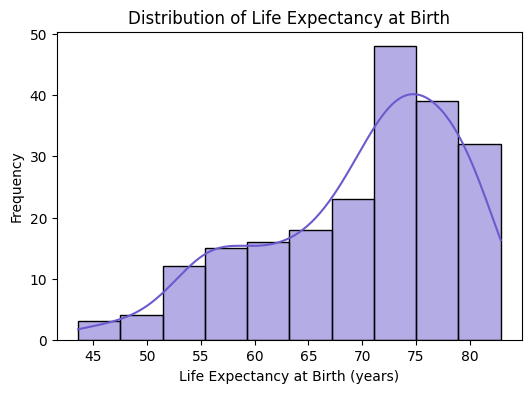

In [39]:
# Display the distribution of life expectancy
plt.figure(figsize=(6, 4))
sns.histplot(data_2008['Life expectancy at birth, total (years)'], kde=True, color='slateblue')
plt.title('Distribution of Life Expectancy at Birth')
plt.xlabel('Life Expectancy at Birth (years)')
plt.ylabel('Frequency')
plt.show()


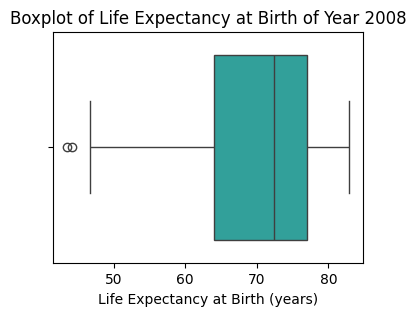

[+] Descriptive Statistics for Life Expectancy at Birth (2008):
count    210.000000
mean      69.885981
std        9.023219
min       43.566000
25%       63.970000
50%       72.405500
75%       76.941207
max       82.893000
Name: Life expectancy at birth, total (years), dtype: float64


In [40]:
# Calculate descriptive statistics for life expectancy
descriptive_stats = data_2008['Life expectancy at birth, total (years)'].describe()

# Generate a boxplot to visualize the distribution
plt.figure(figsize=(4, 3))
sns.boxplot(x=data_2008['Life expectancy at birth, total (years)'], color='lightseagreen')
plt.title('Boxplot of Life Expectancy at Birth of Year 2008')
plt.xlabel('Life Expectancy at Birth (years)')
plt.show()

# Display the descriptive statistics
print("[+] Descriptive Statistics for Life Expectancy at Birth (2008):")
print(descriptive_stats)


In [41]:
# Display the amount of missing data in each column
missing_data = data_2008.isnull().sum()
missing_data = missing_data[missing_data > 0]  # Filter columns with missing values
missing_data.sort_values(inplace=True)
print("[+] Missing Data Amount:")
print(missing_data)


[+] Missing Data Amount:
Forest area (% of land area)                                           7
GDP (current US$)                                                      9
Agriculture, forestry, and fishing, value added (% of GDP)            17
Industry (including construction), value added (% of GDP)             18
Immunization, measles (% of children ages 12-23 months)               22
Current health expenditure (% of GDP)                                 27
Annual freshwater withdrawals, total (% of internal resources)        38
Research and development expenditure (% of GDP)                      113
School enrollment, secondary (% net)                                 117
Income share held by lowest 20%                                      136
Prevalence of underweight, weight for age (% of children under 5)    184
dtype: int64


In [42]:
# Create copies of the data for mean and median imputation
data_mean_imputed = data_numerical.copy()
data_median_imputed = data_numerical.copy()

# Impute missing values using mean
for column in data_mean_imputed.columns:
    data_mean_imputed[column].fillna(data_mean_imputed[column].mean(), inplace=True)

# Impute missing values using median
for column in data_median_imputed.columns:
    data_median_imputed[column].fillna(data_median_imputed[column].median(), inplace=True)

# Check if all missing values are filled
missing_data_after_mean = data_mean_imputed.isnull().sum().max()  # Should be 0 if all are filled
missing_data_after_median = data_median_imputed.isnull().sum().max()  # Should be 0 if all are filled

# Creating a copy for mode imputation and preparing for comparison
data_mode_imputed = data_numerical.copy()

# Impute missing values using mode (most frequent value)
for column in data_mode_imputed.columns:
    # We need to handle the possibility that some columns might not have a mode
    mode_value = data_mode_imputed[column].mode()
    if not mode_value.empty:
        data_mode_imputed[column].fillna(mode_value[0], inplace=True)
    else:
        # If no mode exists, fall back to median
        data_mode_imputed[column].fillna(data_mode_imputed[column].median(), inplace=True)

# Check if all missing values are filled
missing_data_after_mode = data_mode_imputed.isnull().sum().max()  # Should be 0 if all are filled

# Descriptive statistics for original and imputed datasets
stats_original = data_numerical.describe()
stats_mean_imputed = data_mean_imputed.describe()
stats_median_imputed = data_median_imputed.describe()
stats_mode_imputed = data_mode_imputed.describe()

# Display the descriptive statistics for comparison
print("[+] Descriptive Statistics for Original Dataset:")
print(stats_original)
print("\n[+] Descriptive Statistics for Mean Imputed Dataset:")
print(stats_mean_imputed)
print("\n[+] Descriptive Statistics for Median Imputed Dataset:")
print(stats_median_imputed)
print("\n[+] Descriptive Statistics for Mode Imputed Dataset:")
print(stats_mode_imputed)


[+] Descriptive Statistics for Original Dataset:
       Agriculture, forestry, and fishing, value added (% of GDP)  \
count                                         193.000000            
mean                                           11.273611            
std                                            11.475482            
min                                             0.016997            
25%                                             2.368457            
50%                                             7.318955            
75%                                            16.837054            
max                                            65.174565            

       Annual freshwater withdrawals, total (% of internal resources)  \
count                                         172.000000                
mean                                          132.890711                
std                                           701.180117                
min                                  

In [43]:
import numpy as np

key_of_imputation_method = 'check_skewness'  # 'check_skewness' or 'all_median'

if key_of_imputation_method == 'check_skewness':

    # Determine whether to use mean or median imputation based on the skewness of each feature
    # Skewness near 0 suggests symmetric distribution (use mean); significant skew suggests (use median)
    chosen_method = {}
    for column in data_numerical.columns:
        skewness = data_numerical[column].skew()
        if np.abs(skewness) > 1:  # Highly skewed
            chosen_method[column] = 'median'
        else:
            chosen_method[column] = 'mean'

    # Applying the selected imputation method
    data_custom_imputed = data_numerical.copy()
    for column, method in chosen_method.items():
        if method == 'mean':
            data_custom_imputed[column].fillna(data_numerical[column].mean(), inplace=True)
        elif method == 'median':
            data_custom_imputed[column].fillna(data_numerical[column].median(), inplace=True)

    # Verify imputation success
    imputation_success = 1 if ~(data_custom_imputed.isnull().sum().max()) else 0
    print("[+] Imputation Success:", imputation_success)

    # Display the selected imputation method for each feature
    print("[+] Selected Imputation Method for Each Feature:")
    print(chosen_method)

elif key_of_imputation_method == 'all_median':

    # Impute missing values using median for all features
    data_custom_imputed = data_numerical.copy()
    for column in data_custom_imputed.columns:
        data_custom_imputed[column].fillna(data_numerical[column].median(), inplace=True)

    # Verify imputation success
    imputation_success = 1 if ~(data_custom_imputed.isnull().sum().max()) else 0
    print("[+] Imputation Success:", imputation_success)

    # Display the selected imputation method for each feature
    print("[+] Imputation Method: Median for All Features")


[+] Imputation Success: 1
[+] Selected Imputation Method for Each Feature:
{'Agriculture, forestry, and fishing, value added (% of GDP)': 'median', 'Annual freshwater withdrawals, total (% of internal resources)': 'median', 'Current health expenditure (% of GDP)': 'median', 'Forest area (% of land area)': 'mean', 'GDP (current US$)': 'median', 'Immunization, measles (% of children ages 12-23 months)': 'median', 'Income share held by lowest 20%': 'mean', 'Industry (including construction), value added (% of GDP)': 'median', 'Population, total': 'median', 'Prevalence of underweight, weight for age (% of children under 5)': 'mean', 'Research and development expenditure (% of GDP)': 'median', 'School enrollment, secondary (% net)': 'mean', 'Life expectancy at birth, total (years)': 'mean'}


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Preparing the data
X = data_custom_imputed.drop('Life expectancy at birth, total (years)', axis=1)
y = data_custom_imputed['Life expectancy at birth, total (years)']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training Linear Regression model on scaled data
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predicting on test set
y_pred_lr = lr.predict(X_test_scaled)

# Evaluating the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("[+] Linear Regression Evaluation:")
mse_lr, r2_lr


[+] Linear Regression Evaluation:


(34.78031953157718, 0.5090676799800347)

In [45]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# Setting up PCA with Linear Regression in a pipeline
pca_lr_pipeline = make_pipeline(PCA(), LinearRegression())

# Parameters for GridSearchCV to find the optimal number of PCA components
param_grid = {
    'pca__n_components': list(range(1, X_train_scaled.shape[1] + 1))
}

# Grid search to find the optimal number of components for PCA
grid_search = GridSearchCV(pca_lr_pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)

# Best model and PCA components
best_pca_lr = grid_search.best_estimator_
n_components_best = grid_search.best_params_['pca__n_components']

# Evaluating the best PCA model
y_pred_pca_lr = best_pca_lr.predict(X_test_scaled)
mse_pca_lr = mean_squared_error(y_test, y_pred_pca_lr)
r2_pca_lr = r2_score(y_test, y_pred_pca_lr)

print("[+] PCA with Linear Regression Evaluation:")
n_components_best, mse_pca_lr, r2_pca_lr


[+] PCA with Linear Regression Evaluation:


(11, 22.376477345515006, 0.684150804677506)

In [46]:
from sklearn.ensemble import GradientBoostingRegressor

# Training Gradient Boosting model
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train_scaled, y_train)

# Predicting on test set
y_pred_gb = gb.predict(X_test_scaled)

# Evaluating the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("[+] Gradient Boosting Evaluation:")
print(mse_gb, r2_gb)

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Training Decision Tree model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled, y_train)

# Training Random Forest model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)

# Training Support Vector Machine model
svm = SVR()
svm.fit(X_train_scaled, y_train)

# Predicting on test set
y_pred_dt = dt.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test_scaled)
y_pred_svm = svm.predict(X_test_scaled)

# Evaluating the models
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print("\n[+] Decision Tree Evaluation:")
print(mse_dt, r2_dt)
print("\n[+] Random Forest Evaluation:")
print(mse_rf, r2_rf)
print("\n[+] Support Vector Machine Evaluation:")
print(mse_svm, r2_svm)


[+] Gradient Boosting Evaluation:
17.430137010927425 0.7539695518532682

[+] Decision Tree Evaluation:
36.44265175676327 0.4856034730105264

[+] Random Forest Evaluation:
16.172495211833205 0.7717214590956054

[+] Support Vector Machine Evaluation:
36.0332144389142 0.49138277622169735


In [47]:
# Compare the performance of different models

# create a DataFrame for the results
models = ['Linear Regression', 'LinearReg with PCA', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Support Vector Machine']
mse_values = [mse_lr, mse_pca_lr, mse_dt, mse_rf, mse_gb, mse_svm]
r2_values = [r2_lr, r2_pca_lr, r2_dt, r2_rf, r2_gb, r2_svm]

results = pd.DataFrame({'Model': models, 'MSE': mse_values, 'R2 Score': r2_values})
results = results.sort_values(by='R2 Score', ascending=False)
print("\n[+] Model Comparison:")
print(results)



[+] Model Comparison:
                    Model        MSE  R2 Score
3           Random Forest  16.172495  0.771721
4       Gradient Boosting  17.430137  0.753970
1      LinearReg with PCA  22.376477  0.684151
0       Linear Regression  34.780320  0.509068
5  Support Vector Machine  36.033214  0.491383
2           Decision Tree  36.442652  0.485603


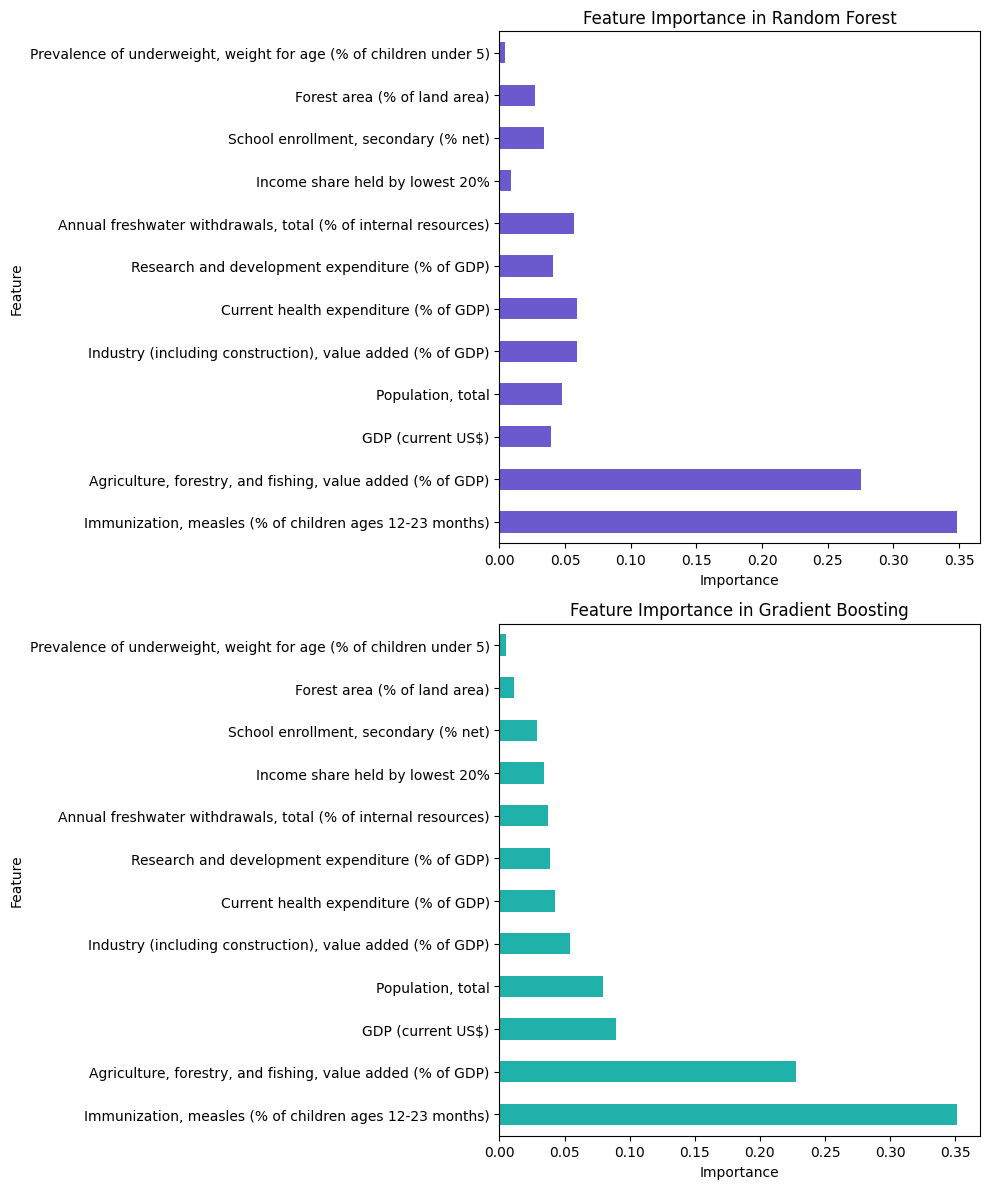

In [48]:
import matplotlib.pyplot as plt

# Extracting feature importance from the RandomForest and Gradient Boosting models
feature_importance_rf = rf.feature_importances_
feature_importance_gb = gb.feature_importances_

# Creating a DataFrame to hold the feature importance data
features = X.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance_RF': feature_importance_rf,
    'Importance_GB': feature_importance_gb
}).sort_values(by='Importance_GB', ascending=False)

# Plotting feature importance
fig, ax = plt.subplots(2, 1, figsize=(10, 12))
importance_df.plot(kind='barh', x='Feature', y='Importance_RF', ax=ax[0], color='slateblue', legend=False)
ax[0].set_title('Feature Importance in Random Forest')
ax[0].set_xlabel('Importance')
importance_df.plot(kind='barh', x='Feature', y='Importance_GB', ax=ax[1], color='lightseagreen', legend=False)
ax[1].set_title('Feature Importance in Gradient Boosting')
ax[1].set_xlabel('Importance')
plt.tight_layout()
plt.show()


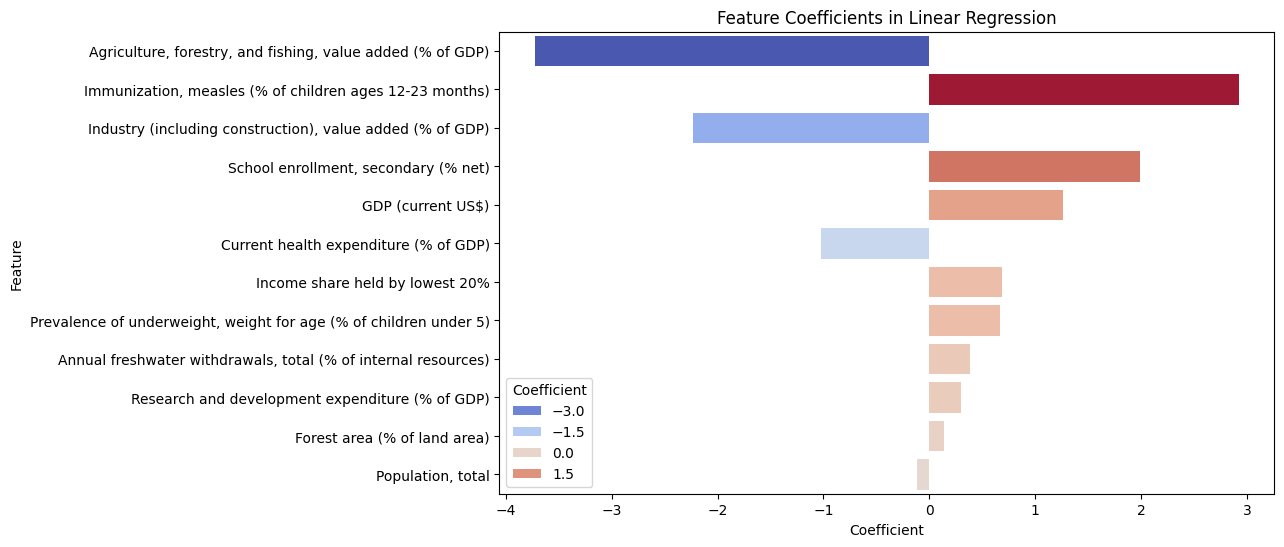

                                              Feature  Coefficient
0   Agriculture, forestry, and fishing, value adde...    -3.728095
5   Immunization, measles (% of children ages 12-2...     2.926382
7   Industry (including construction), value added...    -2.230784
11               School enrollment, secondary (% net)     1.988071
4                                   GDP (current US$)     1.260274
2               Current health expenditure (% of GDP)    -1.024229
6                     Income share held by lowest 20%     0.684089
9   Prevalence of underweight, weight for age (% o...     0.668751
1   Annual freshwater withdrawals, total (% of int...     0.383119
10    Research and development expenditure (% of GDP)     0.300126
3                        Forest area (% of land area)     0.142972
8                                   Population, total    -0.118199


In [49]:
# Extracting coefficients from the Linear Regression model
coefficients_lr = lr.coef_
features_lr = X.columns

# Creating a DataFrame to hold the coefficient data for linear regression
coefficients_df_lr = pd.DataFrame({
    'Feature': features_lr,
    'Coefficient': coefficients_lr
}).sort_values(by='Coefficient', key=abs, ascending=False)

# Plotting coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients_df_lr, palette='coolwarm', hue='Coefficient')
plt.title('Feature Coefficients in Linear Regression')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

print(coefficients_df_lr)


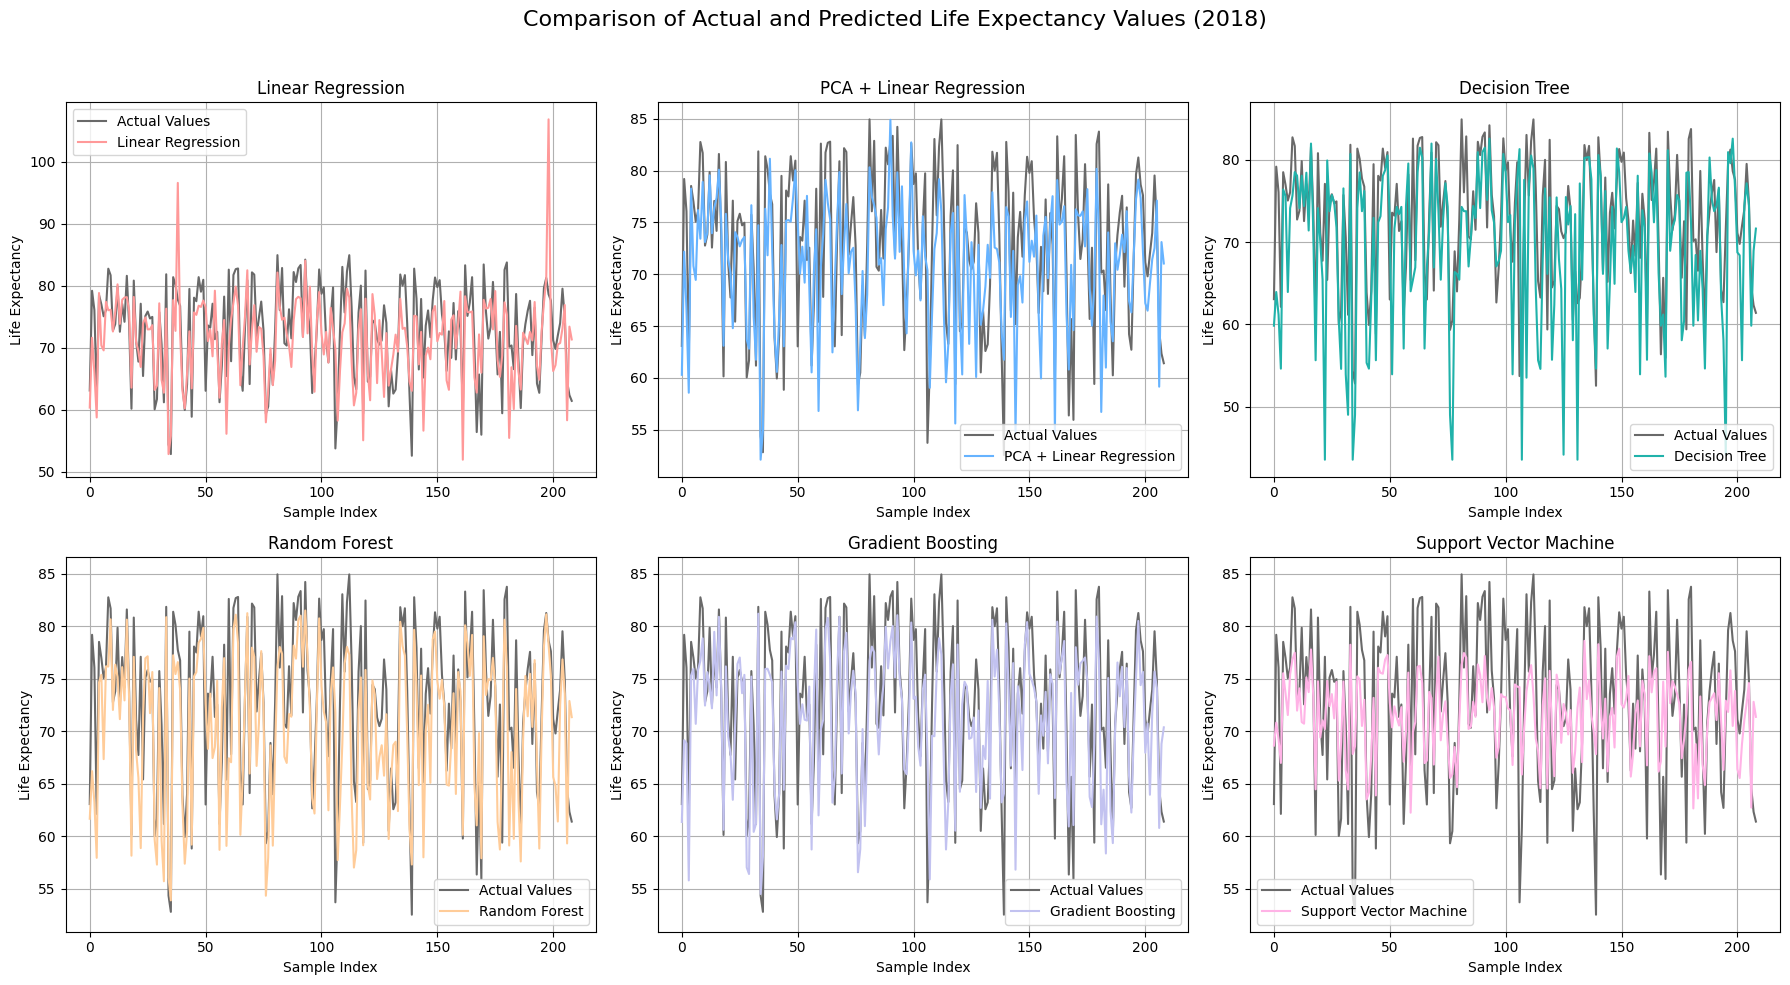

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data for the year 2018
data_2018 = data[10]

data_2018_numerical = data_2018.drop(columns=["Country Name"])

data_2018_custom_imputed = data_2018_numerical.copy()
for column, method in chosen_method.items():
    if method == 'mean':
        data_2018_custom_imputed[column].fillna(data_2018_numerical[column].mean(), inplace=True)
    elif method == 'median':
        data_2018_custom_imputed[column].fillna(data_2018_numerical[column].median(), inplace=True)

# Preprocess the data for prediction
X_2018 = data_2018_custom_imputed.drop('Life expectancy at birth, total (years)', axis=1)
y_2018 = data_2018_custom_imputed['Life expectancy at birth, total (years)']
X_2018_scaled = scaler.transform(X_2018)

# Predict life expectancy for the year 2018 using all models
y_pred_2018_rf = rf.predict(X_2018_scaled)
y_pred_2018_gb = gb.predict(X_2018_scaled)
y_pred_2018_lr = lr.predict(X_2018_scaled)
y_pred_2018_pca_lr = best_pca_lr.predict(X_2018_scaled)
y_pred_2018_dt = dt.predict(X_2018_scaled)
y_pred_2018_svm = svm.predict(X_2018_scaled)

# Plot the comparison of actual and predicted life expectancy values for the year 2018
colors = ['#ff9999','#66b3ff','lightseagreen','#ffcc99','#c2c2f0','#ffb3e6']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Comparison of Actual and Predicted Life Expectancy Values (2018)', fontsize=16)

models = [
    ('Linear Regression', y_pred_2018_lr),
    ('PCA + Linear Regression', y_pred_2018_pca_lr),
    ('Decision Tree', y_pred_2018_dt),
    ('Random Forest', y_pred_2018_rf),
    ('Gradient Boosting', y_pred_2018_gb),
    ('Support Vector Machine', y_pred_2018_svm)
]

for ax, (title, y_pred) in zip(axes.flatten(), models):
    ax.plot(y_2018.values, label='Actual Values', color='dimgrey', linewidth=1.5)
    ax.plot(y_pred, label=title,  color=colors[models.index((title, y_pred))], linewidth=1.5)
    ax.set_title(title)
    ax.set_xlabel('Sample Index')
    ax.set_ylabel('Life Expectancy')
    ax.legend()
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [51]:

# Evaluate the predictions for the year 2018
mse_2018_rf = mean_squared_error(y_2018, y_pred_2018_rf)
r2_2018_rf = r2_score(y_2018, y_pred_2018_rf)
mse_2018_gb = mean_squared_error(y_2018, y_pred_2018_gb)
r2_2018_gb = r2_score(y_2018, y_pred_2018_gb)
mse_2018_lr = mean_squared_error(y_2018, y_pred_2018_lr)
r2_2018_lr = r2_score(y_2018, y_pred_2018_lr)
mse_2018_pca_lr = mean_squared_error(y_2018, y_pred_2018_pca_lr)
r2_2018_pca_lr = r2_score(y_2018, y_pred_2018_pca_lr)
mse_2018_dt = mean_squared_error(y_2018, y_pred_2018_dt)
r2_2018_dt = r2_score(y_2018, y_pred_2018_dt)
mse_2018_svm = mean_squared_error(y_2018, y_pred_2018_svm)
r2_2018_svm = r2_score(y_2018, y_pred_2018_svm)

# Create a DataFrame to hold the results of all models
results_2018_all = pd.DataFrame({
    'Model': ['Linear Regression', 'PCA + Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Support Vector Machine'],
    'MSE': [mse_2018_lr, mse_2018_pca_lr, mse_2018_dt, mse_2018_rf, mse_2018_gb, mse_2018_svm],
    'R2 Score': [r2_2018_lr, r2_2018_pca_lr, r2_2018_dt, r2_2018_rf, r2_2018_gb, r2_2018_svm]
})

# Display the results for all models
results_2018_all = results_2018_all.sort_values(by='R2 Score', ascending=False)
results_2018_all


,Model,MSE,R2 Score
4,Gradient Boosting,20.105629,0.648854
3,Random Forest,25.385757,0.556636
1,PCA + Linear Regression,28.841670,0.496278
5,Support Vector Machine,30.856629,0.461087
0,Linear Regression,34.030124,0.405661
2,Decision Tree,59.194027,-0.033828


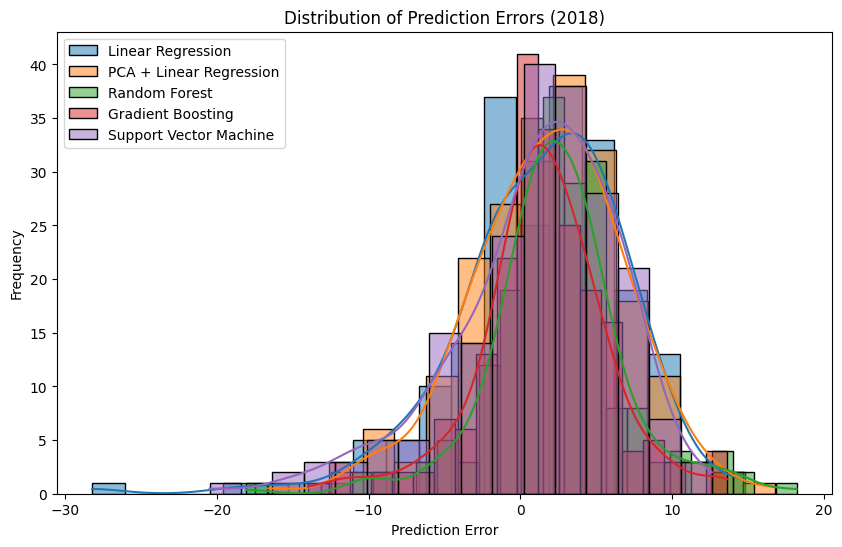

In [52]:
# calculate the prediction errors for the year 2018
error_lr = y_2018 - y_pred_2018_lr
error_pca_lr = y_2018 - y_pred_2018_pca_lr
# error_dt = y_2018 - y_pred_2018_dt
error_rf = y_2018 - y_pred_2018_rf
error_gb = y_2018 - y_pred_2018_gb
error_svm = y_2018 - y_pred_2018_svm

# Create a DataFrame to hold the prediction errors
error_df = pd.DataFrame({
    'Actual': y_2018,
    'Linear Regression': error_lr,
    'PCA + Linear Regression': error_pca_lr,
    # 'Decision Tree': error_dt,
    'Random Forest': error_rf,
    'Gradient Boosting': error_gb,
    'Support Vector Machine': error_svm
})

# Display the distribution of prediction errors for the year 2018
plt.figure(figsize=(10, 6))
for model, error in error_df.items():
    if model == 'Actual': continue
    sns.histplot(error, kde=True, label=model)
plt.title('Distribution of Prediction Errors (2018)')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.legend()
plt.show()


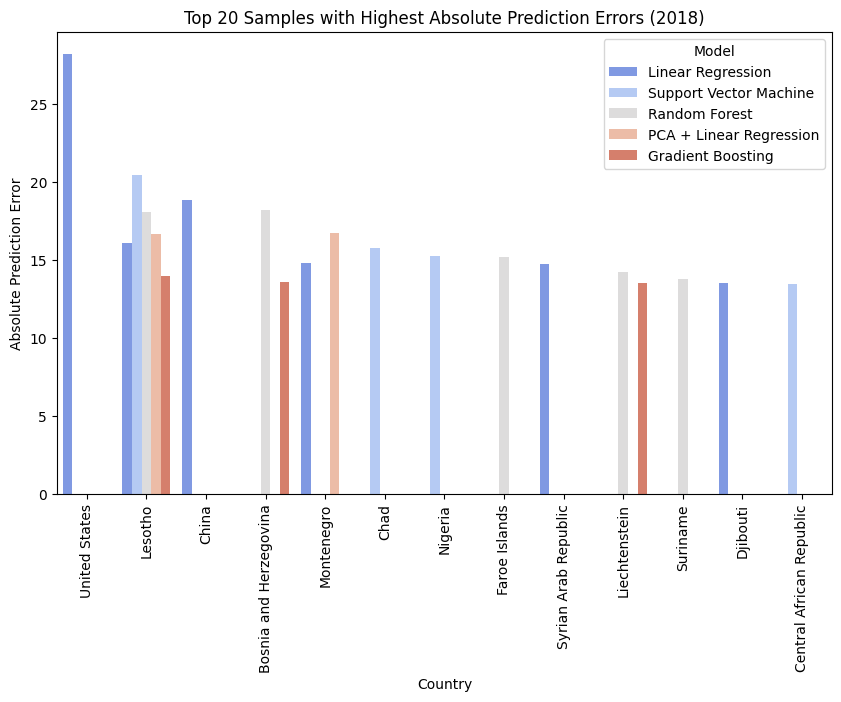

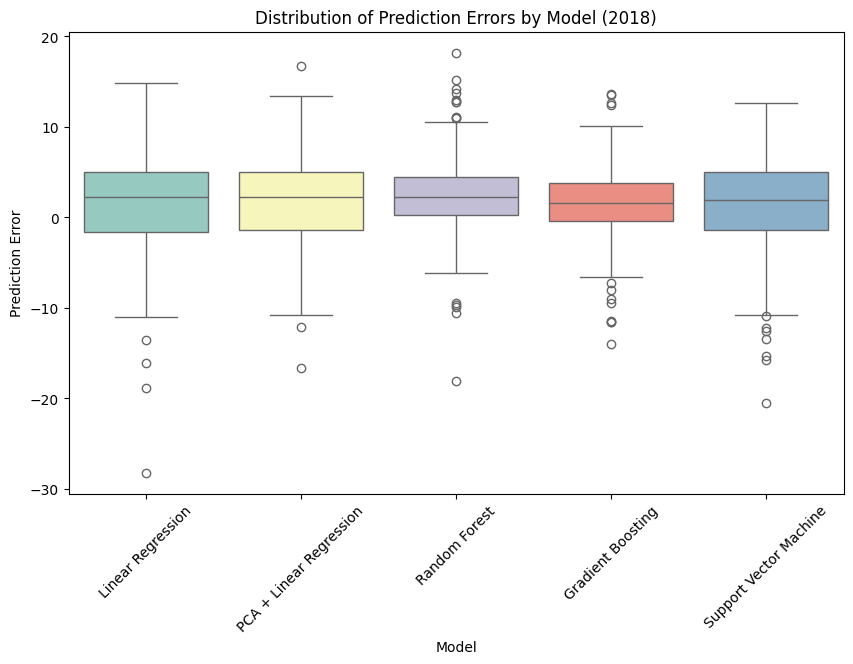

[+] Top 20 Samples with Highest Absolute Prediction Errors (2018):


,Actual,Country,Model,Error,Absolute Error
198,78.639024,United States,Linear Regression,-28.211275,28.211275
942,53.733000,Lesotho,Support Vector Machine,-20.474818,20.474818
38,77.744000,China,Linear Regression,-18.848188,18.848188
440,77.093000,Bosnia and Herzegovina,Random Forest,18.203954,18.203954
524,53.733000,Lesotho,Random Forest,-18.060887,18.060887
336,76.841463,Montenegro,PCA + Linear Regression,16.754975,16.754975
315,53.733000,Lesotho,PCA + Linear Regression,-16.640875,16.640875
106,53.733000,Lesotho,Linear Regression,-16.063521,16.063521
871,52.825000,Chad,Support Vector Machine,-15.756408,15.756408
975,52.554000,Nigeria,Support Vector Machine,-15.271161,15.271161


In [53]:
# Perform error analysis for the year 2018
error_analysis = error_df.copy()
error_analysis['Country'] = data_2018['Country Name']

# Find the top 20 samples with the highest absolute prediction errors
top_errors = error_analysis.melt(id_vars=['Actual', 'Country'], var_name='Model', value_name='Error')
top_errors['Absolute Error'] = top_errors['Error'].abs()
top_errors_sorted = top_errors.sort_values(by='Absolute Error', ascending=False).head(20)

# Plot the top 20 samples with the highest absolute prediction errors
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Absolute Error', hue='Model', data=top_errors_sorted, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Top 20 Samples with Highest Absolute Prediction Errors (2018)')
plt.xlabel('Country')
plt.ylabel('Absolute Prediction Error')
plt.show()

# Melt the DataFrame for error distribution visualization
error_distribution = error_analysis.melt(id_vars=['Actual', 'Country'], var_name='Model', value_name='Error')

# Plot the distribution of prediction errors by model for the year 2018
plt.figure(figsize=(10, 6))
sns.boxplot(x='Model', y='Error', data=error_distribution, palette='Set3', hue='Model')
plt.title('Distribution of Prediction Errors by Model (2018)')
plt.xlabel('Model')
plt.ylabel('Prediction Error')
plt.xticks(rotation=45)
plt.show()

print("[+] Top 20 Samples with Highest Absolute Prediction Errors (2018):")
top_errors_sorted

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Get the data for the year 2008
X = data_custom_imputed.drop('Life expectancy at birth, total (years)', axis=1)
y = data_custom_imputed['Life expectancy at birth, total (years)']

# Stepwise forward selection
def stepwise_selection(X, y, initial_list=[], threshold_in=0.01, threshold_out=0.05, verbose=True):
    included = list(initial_list)
    while True:
        changed = False
        # Forward step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # Backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

selected_features = stepwise_selection(X, y)

# Building the final model with selected features
X_final = sm.add_constant(X[selected_features])
final_model = sm.OLS(y, X_final).fit()

final_model.summary(), selected_features


Add  Immunization, measles (% of children ages 12-23 months) with p-value 4.51017e-23
Add  Agriculture, forestry, and fishing, value added (% of GDP) with p-value 1.03105e-13
Add  School enrollment, secondary (% net) with p-value 1.08277e-05
Add  Industry (including construction), value added (% of GDP) with p-value 0.000499931
Add  Research and development expenditure (% of GDP) with p-value 0.00489764


(<class 'statsmodels.iolib.summary.Summary'>
 """
                                        OLS Regression Results                                      
 Dep. Variable:     Life expectancy at birth, total (years)   R-squared:                       0.606
 Model:                                                 OLS   Adj. R-squared:                  0.596
 Method:                                      Least Squares   F-statistic:                     62.78
 Date:                                     Tue, 28 May 2024   Prob (F-statistic):           2.01e-39
 Time:                                             23:48:19   Log-Likelihood:                -661.61
 No. Observations:                                      210   AIC:                             1335.
 Df Residuals:                                          204   BIC:                             1355.
 Df Model:                                                5                                         
 Covariance Type:                        

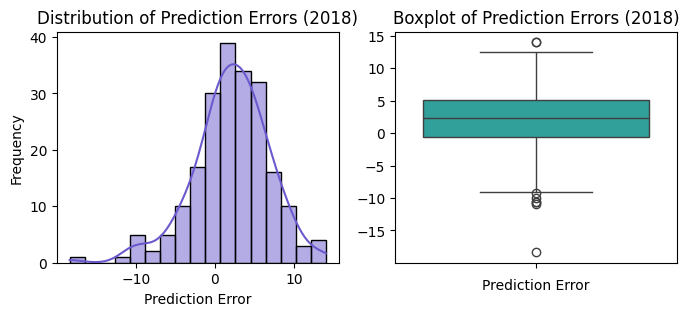

(27.259163580518415,
 0.5239165537432848,
 count    209.000000
 mean       2.045397
 std        4.815232
 min      -18.361988
 25%       -0.620388
 50%        2.404650
 75%        5.075390
 max       14.020043
 dtype: float64)

In [65]:
# Preparing the 2018 data with selected features
X_2018 = data_2018_custom_imputed[selected_features]
y_2018 = data_2018_custom_imputed['Life expectancy at birth, total (years)']

# Adding constant for the prediction model
X_2018_final = sm.add_constant(X_2018)

# Predict life expectancy for the year 2018
y_pred_2018 = final_model.predict(X_2018_final)

# Compute errors
prediction_errors = y_2018 - y_pred_2018

# Basic evaluation metrics
mse_2018 = mean_squared_error(y_2018, y_pred_2018)
r2_2018 = r2_score(y_2018, y_pred_2018)

# Plot the distribution of prediction errors for the year 2018
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
sns.histplot(prediction_errors, kde=True, color='slateblue')
plt.title('Distribution of Prediction Errors (2018)')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
sns.boxplot(prediction_errors, color='lightseagreen')
plt.title('Boxplot of Prediction Errors (2018)')
plt.xlabel('Prediction Error')
plt.show()

mse_2018, r2_2018, prediction_errors.describe()
